# Exploring Factors Affecting Human Life Expectancy and Building a Predictive Model  

The aim of this analysis is to investigate the factors influencing Life Expectancy and develop a predictive model for it.  
Life expectancy is a vital indicator of societal well-being and development. By understanding these factors, we can gain insights that will aid policymakers and governments in making informed decisions and implementing effective public health policies.

Objectives:
> 1. Assess the impact of Birth Rate on Life Expectancy.  
> 2. Identify additional factors influencing Life Expectancy.  
> 4. Build a model to predict Life Expectancy.  
> 3. Categorize countries into clusters based on their Life Expectancy.

## About the data
The dataset used in this analysis can be downloaded from [WorldBank Birth Rate data](https://data.worldbank.org/indicator/SP.DYN.CBRT.IN) , [WorldBank Life Expectancy data](https://data.worldbank.org/indicator/SP.DYN.LE00.IN) and [WorldBank Infant Mortality Rate](https://data.worldbank.org/indicator/SP.DYN.IMRT.IN).  
The dataset are licensed under License CC BY-4.0.  

The excel sheets contain data on Birth Rate, Life Expectancy and Infant Mortality Rate of countries from the year 1960 to 2020, along with each countries Income Group and Geographic Region.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from yellowbrick.regressor import PredictionError, ResidualsPlot

## 1. Load, examine and clean the data

In [2]:
# Read and load the excel sheets
folder_path = 'D:/PortfolioProjects/BirthRatevsLifeExpectancy/'
data_birth_rate = pd.read_excel(folder_path + 'birthrate.xls')
data_life_expectancy= pd.read_excel(folder_path + 'lifeexpectancy.xls')
data_mortality_rate = pd.read_excel(folder_path + 'mortalityrate.xls')

del folder_path

After examining the data, we will perfom the following to clean and arrange the data:  
> Remove rows with integer values for 'Region' & 'Income Group' columns  
> Drop columns which are not required for analysis  
> Remove rows with missing values for 'Country Name', 'Region' & 'Income Group' columns  
> Add 'Income Group' for Venezuala  

In [3]:
# Filter out rows with integer values for 'Region' and 'Income Group'
data_birth_rate = data_birth_rate[data_birth_rate['Region'].apply(lambda x: type(x) != int)]
data_life_expectancy = data_life_expectancy[data_life_expectancy['Region'].apply(lambda x: type(x) != int)]

# Drop columns not required for analysis
data_life_expectancy = data_life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2021'], axis=1)
data_birth_rate = data_birth_rate.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2021'], axis=1)

data_life_expectancy.isnull().sum()

Country Name     3
1960            26
1961            25
1962            25
1963            26
                ..
2018            18
2019            18
2020            18
Region           5
Income Group     5
Length: 64, dtype: int64

In [4]:
# Drop na rows
data_life_expectancy = data_life_expectancy.dropna(subset=['Country Name', 'Region', 'Income Group'])
data_life_expectancy.isnull().sum()

data_birth_rate = data_birth_rate.dropna(subset=['Country Name', 'Region', 'Income Group'])
data_birth_rate.isnull().sum()

Country Name     0
1960            18
1961            19
1962            18
1963            19
                ..
2018             7
2019             6
2020             8
Region           0
Income Group     0
Length: 64, dtype: int64

In [5]:
# Add Income Level for Venezula
data_life_expectancy.loc[253, 'Country Name'] 
data_life_expectancy.loc[253, 'Income Group'] = 'Lower middle income'

## 2. Bivariate Linear Regression
Let us first explore the relationship between Birth Rate and Life Expectancy.  
We will use a Linear model.
The model assumes a linear relationship between the predictor variable (Birth Rate, in our case) and the response variable (Life Expectancy).  

We will narrow our attention to one year from each decade within the dataset, which covers the period from 1960 to 2020.

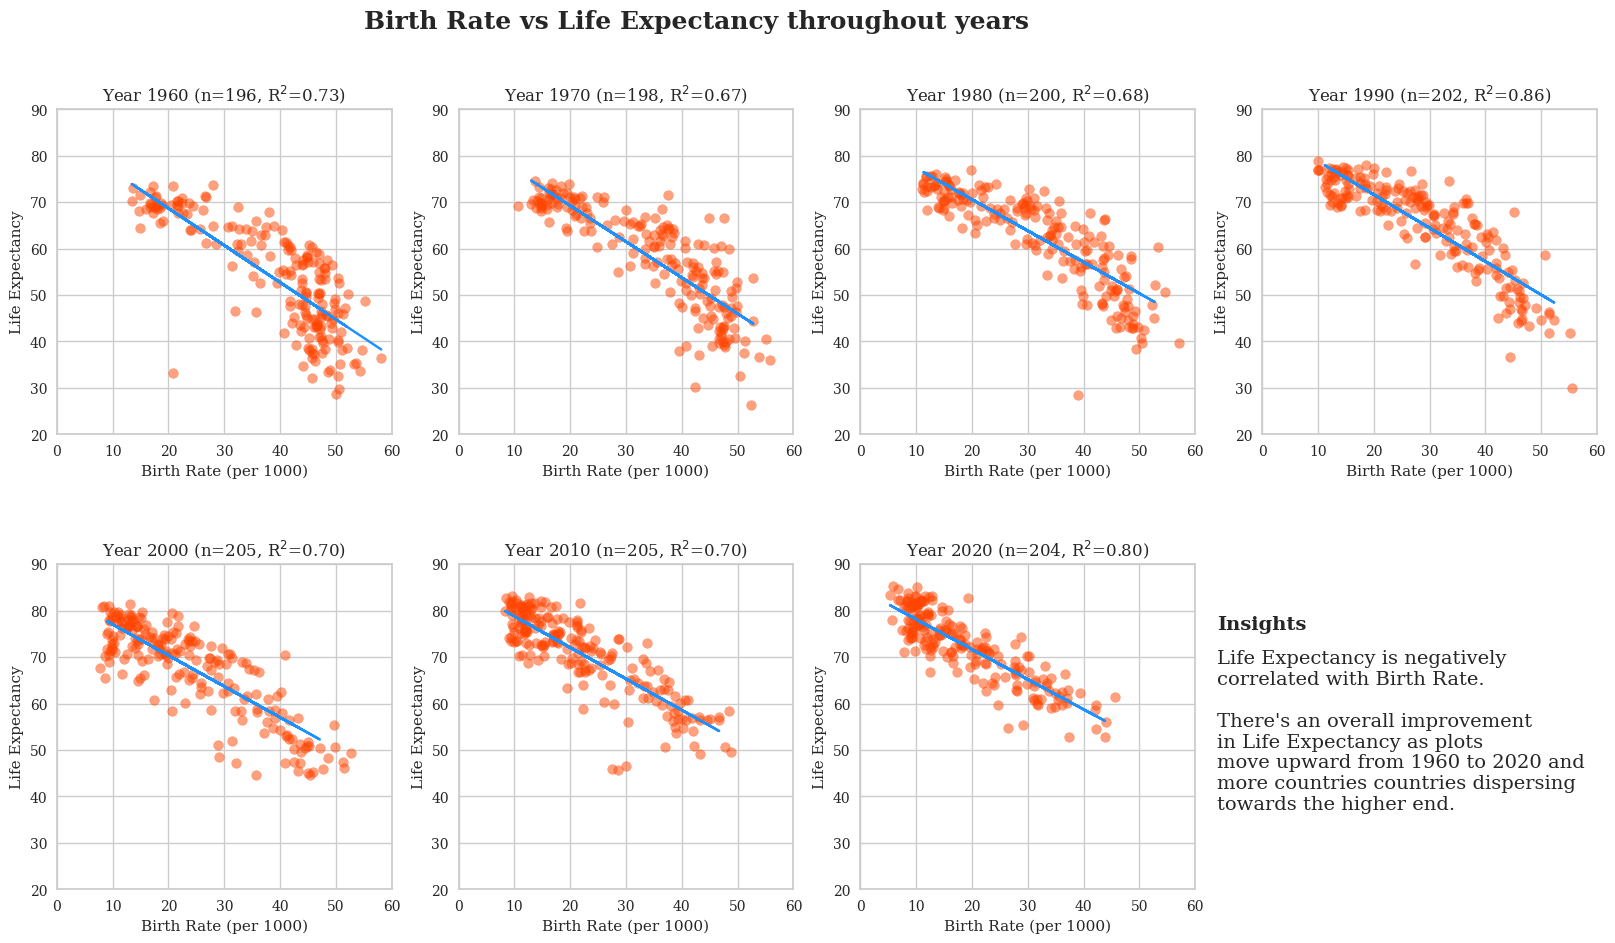

In [7]:
fig,axs = plt.subplots(2,4, figsize=(20,10))
ols = linear_model.LinearRegression()

idx = 0
years =['1960', '1970', '1980', '1990', '2000', '2010', '2020']

for i in range(2):
    for j in range(4):
        if(idx==7):
            break
        curr_year = years[idx]
        x = data_birth_rate[curr_year].values
        y = data_life_expectancy[curr_year].values
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask]
        y = y[mask]
        X = x.reshape(-1,1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
        lm = linear_model.LinearRegression().fit(X_train, y_train)
        lm_predicted = lm.predict(X_test)
        r2 = r2_score(y_test, lm_predicted)

        axs[i,j].plot(X_test, lm_predicted, color='dodgerblue', label='Regression model')
        axs[i,j].scatter(X, y, edgecolor='orangered', facecolor='orangered', alpha=0.5, label='Sample data')
        axs[i,j].set_title(f"Year {curr_year} (n={x.size}, R$^2$={r2:.2f})")

        # del x, y, mask, X, model, response, r2
        del x, y, mask, X,  X_train, X_test, y_train, y_test, lm, lm_predicted
        idx = idx +1

axs[1,3].remove()

# add x and y labels to all subplots
for ax in axs.flat:
    ax.set_xlabel('Birth Rate (per 1000)')
    ax.set_ylabel('Life Expectancy')
    ax.set_xlim([0, 60])
    ax.set_ylim([20, 90])

plt.rcParams['font.family'] = 'serif'
plt.subplots_adjust(hspace=0.4, top=0.88, bottom=0.1, left=0.18, right=0.95)

fig.suptitle('Birth Rate vs Life Expectancy throughout years', fontsize=18, fontweight='bold', ha='center')
fig.text(0.76, 0.36, "Insights", fontfamily='serif', fontweight='bold', fontsize=14)
fig.text(0.76, 0.18, 
         '''Life Expectancy is negatively
correlated with Birth Rate.

There's an overall improvement
in Life Expectancy as plots
move upward from 1960 to 2020 and
more countries countries dispersing
towards the higher end. ''',  fontfamily='serif', fontsize=14)

plt.show()

del ax, axs, curr_year, fig, i, idx, j, years, r2, ols

### Model Evaluation (with Birth Rate as Predictor)  
The two common metrics that evaluate a Linear Regression Model's accuracy is Adjusted $R^{2}$ and Root Mean Squared Error (RMSE) value.  
While RMSE tells us how erroneous the model’s predictions are when compared to actual observed values,  
Adjusted $R^{2}$ allows us to measure the strength of the relationship between the response and predictor variables in the model.  

We are using adjusted $R^{2}$ instead of plain $R^{2}$ because later we want to add more predictors into the model,  
adjusted $R^{2}$ is a more accurate metric to compare models as it adjusts for the number of predictors being used in the model.

In [8]:
# Create a dataframe for the year 2020 with birth rate, life expectancy, and mortality_rate
df_2020 = data_life_expectancy[['Country Name', 'Region', 'Income Group', '2020']]
df_2020 = df_2020.rename(columns={'2020': 'LE'})
df_2020 = df_2020.dropna(subset=['LE'])

df_2020 = pd.merge(df_2020, data_birth_rate[['Country Name', '2020']], how='left', on=['Country Name'])
df_2020 = df_2020.rename(columns={'2020': 'BR'})

df_2020 = pd.merge(df_2020, data_mortality_rate[['Country Name', '2020']], how='left', on=['Country Name'])
df_2020 = df_2020.rename(columns={'2020': 'MR'})

RMSE:  3.737584810001669
Regression Coefficient:  [-0.64671556]
Adjusted R-squared:  0.7978980477124575


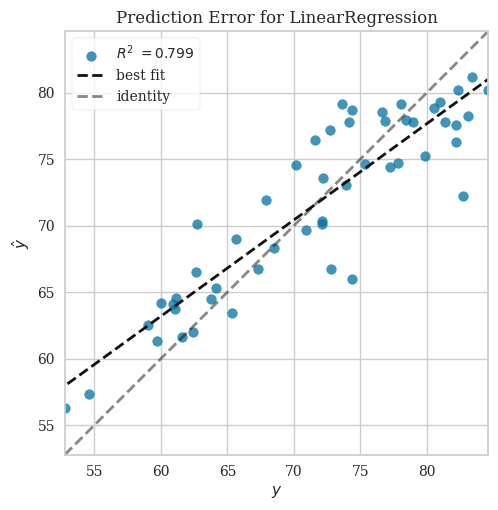

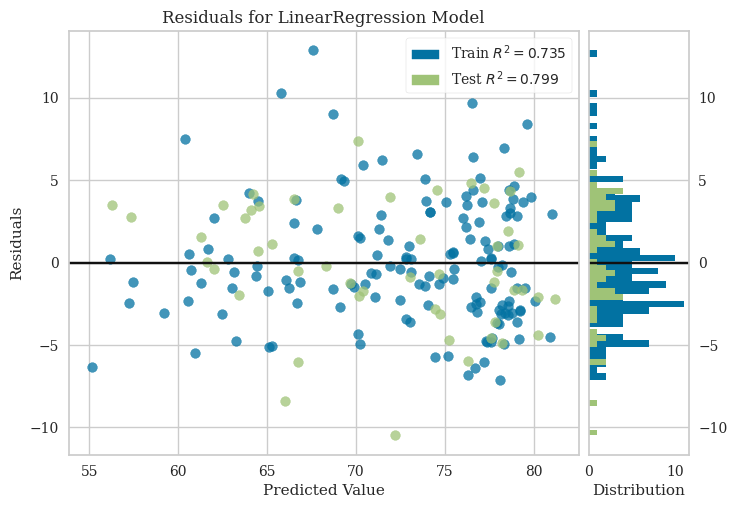

In [9]:
# Visualizing Prediction Error for year 2020
x = df_2020['BR'].values
y = df_2020['LE'].values

mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

X = x.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
lm = linear_model.LinearRegression().fit(X_train, y_train)
lm_predicted = lm.predict(X_test)
r2 = r2_score(y_test, lm_predicted)
k = 1
n = len(X)
adjusted_r2 = 1- ((1-r2) * (n-1)/(n-k-1))

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm_predicted)))
print("Regression Coefficient: ", lm.coef_)
print("Adjusted R-squared: ", adjusted_r2)

pe = PredictionError(lm).fit(X_train, y_train)
pe.score(X_test, y_test)
pe.show()

rp = ResidualsPlot(lm).fit(X_train, y_train)
rp.score(X_test, y_test)
rp.show()

del r2, k, n, adjusted_r2
del pe, rp, x, y, mask, X, X_train, X_test, y_train, y_test, lm, lm_predicted

The RMSE score is 3.74, and the residual plot shows that the residuals are not tight around 0.  
The range of Life expectancy value is 32.61, so RMSE of 3.74 is on the lower side. We can say that the model makes good predictions.  

Adjusted $R^{2}$ is ~0.80. This means that Birth Rate can explain variance in Life Expectancy correctly upto 80% accuracy.

# Considering Other Factors
Several other factors influence Life Expectancy, including access to healthcare and various factors related to genetics, hygiene, diet, nutrition, exercise, lifestyle, and crime rate.  

As quantifying the factors mentioned in the second list can be challenging, we will focus on studying the impact of healthcare accessibility on Life Expectancy.  
Typically, countries with higher income tend to have better access to healthcare services.  
However, it is important to note that Health Equity varies significantly within countries.

To further explore this, we will introduce the variable "Income Group" as an additional predictor in our model.

## 3. Multivariate Linear Regression
### Encode Categorical variable into Numerical Variable

In this dataset, Income Group is a categorical variable divided into 4 categories - High income, Upper middle income, Lower middle Income & Low income.  
We will convert it into numerical variable as Regression analysis requires features to be continous.  

In [10]:
# set and order categories
df_2020["Income Group"] = df_2020["Income Group"].astype("category")
category_order_list = ["High income", "Upper middle income", "Lower middle income", "Low income"]
df_2020["Income Group"] = df_2020["Income Group"].cat.set_categories(category_order_list, ordered=True)

mapping = {'High income': 4, 'Upper middle income': 3, 'Lower middle income': 2, 'Low income': 1}
df_2020['Income Level'] = df_2020['Income Group'].replace(mapping)

del mapping, category_order_list

## Model with Birth Rate and Income Level as predictors

RMSE:  3.573735380129188
R^2:  0.8161394683533838
Adjusted R-squared:  0.8143100103270493


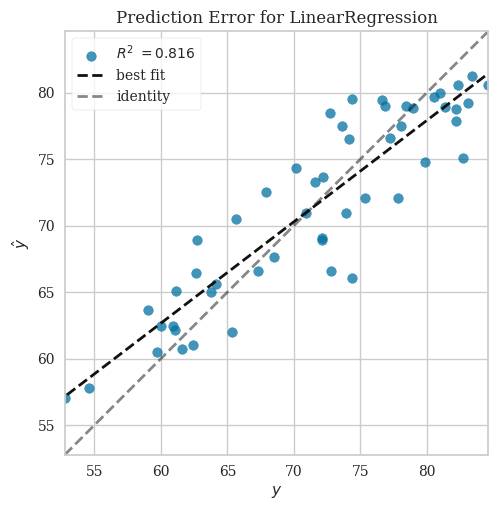

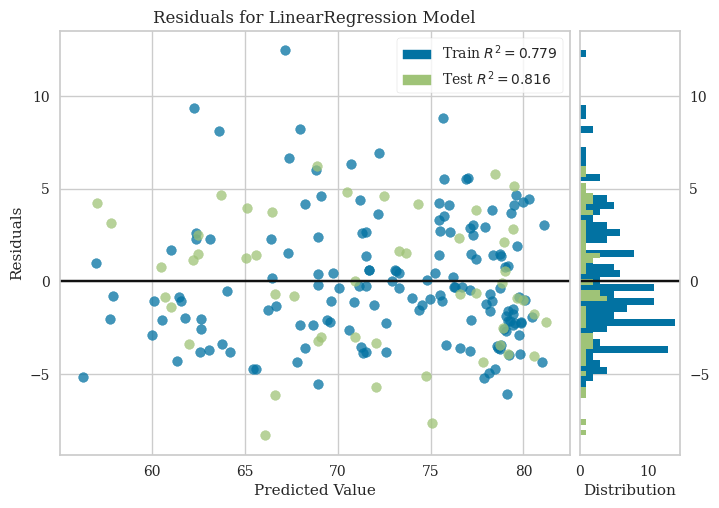

In [16]:
X = df_2020[['BR', 'Income Level']].values.reshape(-1,2)
y = df_2020['LE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
lm2 = linear_model.LinearRegression().fit(X_train, y_train)
lm2_predicted = lm2.predict(X_test)
r2 = r2_score(y_test, lm2_predicted)
n=len(X)
k=2
adjusted_r2 = 1-((1-r2) * (n-1)/(n-k-1))

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm2_predicted)))
print("R^2: ", r2) 
print("Adjusted R-squared: ", adjusted_r2)

pe = PredictionError(lm2).fit(X_train, y_train)
pe.score(X_test, y_test)
pe.show()

rp = ResidualsPlot(lm2).fit(X_train, y_train)
rp.score(X_test, y_test)
rp.show()

del y, X, X_train, X_test, y_train, y_test, lm2, lm2_predicted, pe, rp,k, n, r2, adjusted_r2

## Model Evaluation (with Birth Rate and Income Level as Predictor)  
We saw a very minute improvement in the RMSE and Adjusted $R^{2}$ value after adding Income Level as the second predictor.  
So we conclude that Income level alone is not a strong indicator of Life Expectancy, as health equity varies within countries.


## 4. Clustering analysis (K-means)  
To gain further insights and identify patterns within the data, we will perform clustering on countries based on their Life Expectancies.  
By clustering countries, we could find life expectancy patterns across different groups.

We will use Elbow method to pick the appropriate number of clusters.  

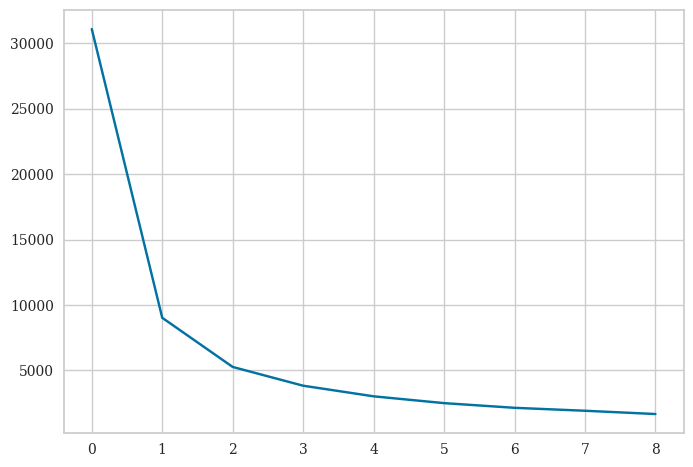

In [39]:
#Elbow-method to pick to choose number of clusters
from sklearn.cluster import KMeans
scores_1 = []
range_values = range(1,10)

for i in range_values:
    kmeans = KMeans(n_clusters = i, n_init=10)
    kmeans.fit(df_2020[['BR', 'LE']])
    # if you want to select only the first 7 columns, then
    # kmeans.fir(creditcard_df_scaled[:, :7])
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')

del scores_1, range_values, i

Even though 2 appears to be forming the elbow of the curve, the values do not reduce linearly until the 3th cluster.  
We will choose the number of clusters to be 3.

In [42]:
# Apply K-Means Clustering
kmeans = KMeans(3, n_init=10)
kmeans.fit(df_2020[['BR', 'LE']])
labels = kmeans.labels_ #Label/cluster of each data point
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['BR', 'LE'])
cluster_centers #returns the centroid for each feature


,BR,LE
0,11.041028,78.227818
1,21.725576,70.148316
2,34.289310,61.232167


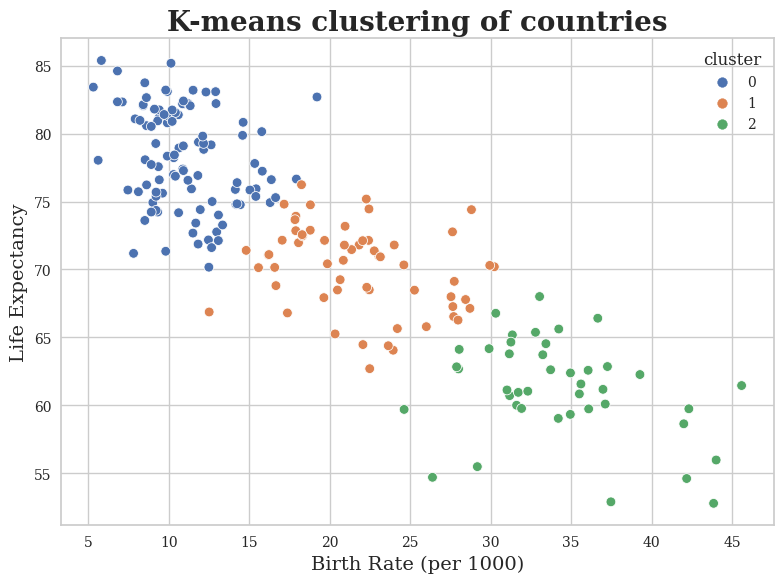

In [52]:
# Visualize the clusters to assign correct cluster names
year2020_cluster = pd.concat([df_2020.reset_index(drop=True), pd.DataFrame({'cluster': labels})], axis=1)

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=year2020_cluster, x="BR", y="LE", ax=ax, hue="cluster", palette="deep")
ax.set_title('K-means clustering of countries', fontsize=20, fontweight='bold')
ax.set_xlabel('Birth Rate (per 1000)', fontsize=14)
ax.set_ylabel('Life Expectancy', fontsize=14)
plt.tight_layout()

del labels, kmeans, fig, ax

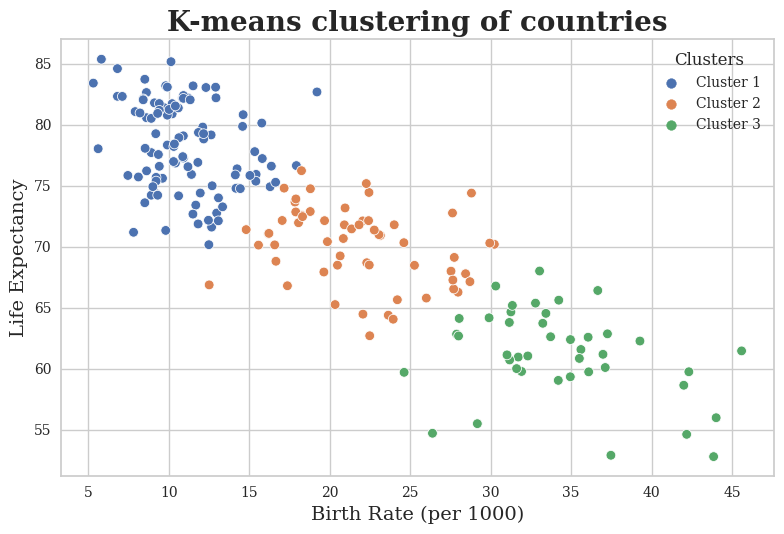

In [53]:
# Mapping Clusters
mapping = {0 : 'Cluster 1', 1 : 'Cluster 2', 2 : 'Cluster 3' }
year2020_cluster['Clusters'] = year2020_cluster['cluster'].replace(mapping)
year2020_cluster.sort_values(by='Clusters', ascending=True, inplace=True)
ax = sns.scatterplot(data=year2020_cluster, x="BR", y="LE", hue="Clusters", palette="deep")

ax.set_title('K-means clustering of countries', fontsize=20, fontweight='bold')
ax.set_xlabel('Birth Rate (per 1000)', fontsize=14)
ax.set_ylabel('Life Expectancy', fontsize=14)
plt.tight_layout()

del mapping

We successfully clustered countries into the following 3 clusters:  
> Cluster 1: Countries with Low Birth Rate and High Life Expectancy   
> Cluster 2: Countries with Medium Birth Rate and Medium Life Expectancy  
> Cluster 3: Countries with High Birth Rate and Low Life Expectancy  

Let us now see how Income Level and Geographical Regions are distributed within each clusters.  

## 7. Region and Income Type Distribution in each Cluster

Clusters
Cluster 1    103
Cluster 2     59
Cluster 3     42
Name: Country Name, dtype: int64


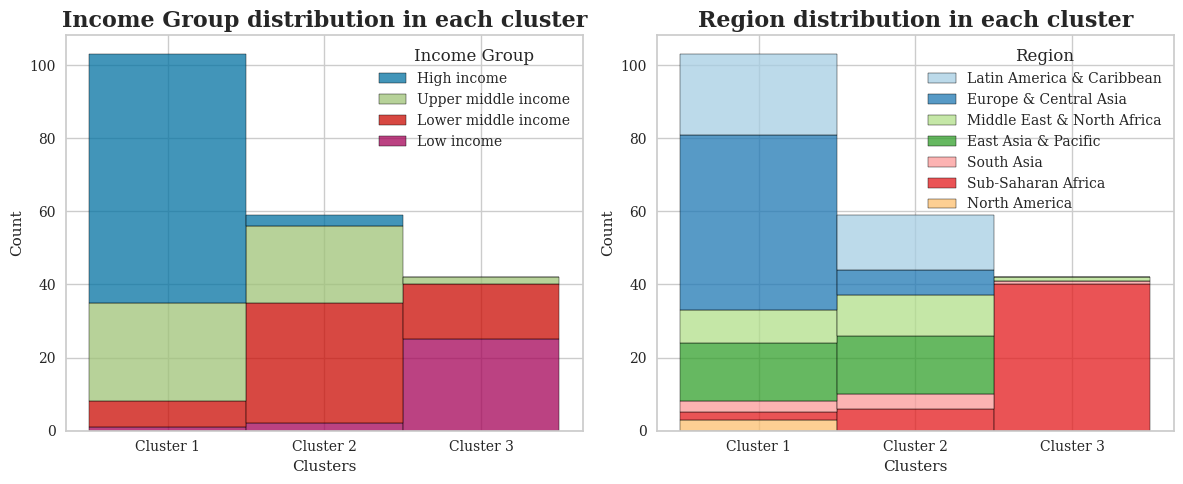

In [58]:
# set and order categories
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

year2020_cluster["Income Group"] = year2020_cluster["Income Group"].astype("category")
category_order_list = ["High income", "Upper middle income", "Lower middle income", "Low income"]
year2020_cluster["Income Group"] = year2020_cluster["Income Group"].cat.set_categories(category_order_list, ordered=True)

sns.histplot(data=year2020_cluster, x="Clusters", ax=ax1, hue="Income Group", multiple="stack", binwidth = 0.2)

sns.histplot(data=year2020_cluster, x="Clusters", ax=ax2, hue="Region", multiple="stack", binwidth= 0.2, palette="Paired")
print(year2020_cluster.groupby('Clusters')['Country Name'].count())

ax1.set_title("Income Group distribution in each cluster", fontsize=16, fontweight='bold')
ax2.set_title("Region distribution in each cluster", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

del fig, ax1, ax2, category_order_list

In terms of Income Group distribution, we see that  
> Cluster 1 majorly consists of high and upper middle income countries  
> Cluster 2 majorly consists of middle income countries  
> Cluster 3 majorly consists of low and lower middle income countries  

The analysis of regional distribution reveals a significant finding:  
Cluster 3 predominantly comprises countries from the Sub-Saharan Africa region.  

A low Life Expectancy despite high Birth Rate in this cluster could be due to a high infant Mortality Rate.

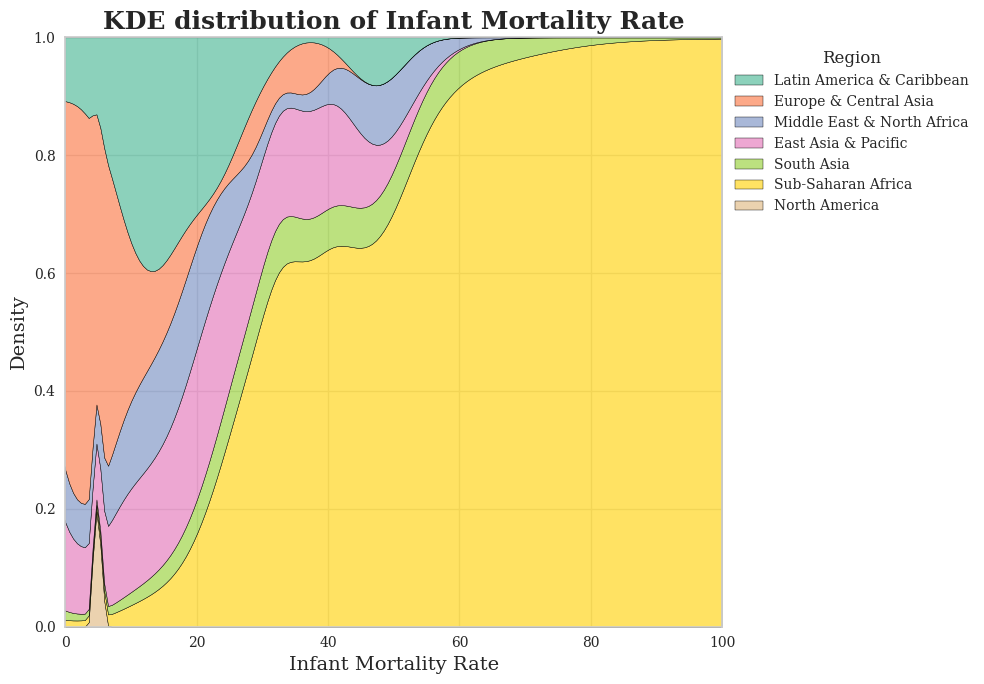

In [61]:
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(data=year2020_cluster, x="MR", hue="Region", multiple="fill", palette="Set2")
ax.set_xlim(0, 100)
ax.set_title('KDE distribution of Infant Mortality Rate', fontsize=18, fontweight='bold')
ax.set_xlabel('Infant Mortality Rate', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()

del fig, ax

KDE plot for Mortality Rate across different regions tells us that countries in Sub-Saharan Africa region have significantly higher mortality rates.

## Model with Birth Rate and Infant Mortality Rate as Predictors

Few countries in Cluster 1 with a High Income had missing data for infant Mortality Rate,  
I couldn't find any other reliable source, so for analysis I have replaced nan values with the average Infant Mortality Rate of High Income Group Cluster.

In [21]:
avg_MR_high_income_countries = df_2020.groupby('Income Group')['MR'].mean()
avg_MR_high_income_countries

Income Group
High income             4.714545
Upper middle income    14.198000
Lower middle income    27.840000
Low income             48.385714
Name: MR, dtype: float64

In [25]:
# replace nan values in MR column with mean MR value of High Income countries which is 4.71
df_2020['MR'].fillna(4.71, inplace=True)
del avg_MR_high_income_countries

Clusters
Cluster 1    103
Cluster 2     59
Cluster 3     42
Name: Country Name, dtype: int64
RMSE:  2.8096865839880145
R^2:  0.8863526054430164
Adjusted R-squared:  0.8852217855966783


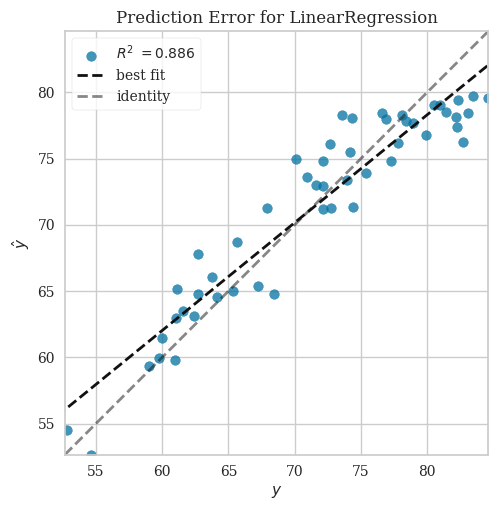

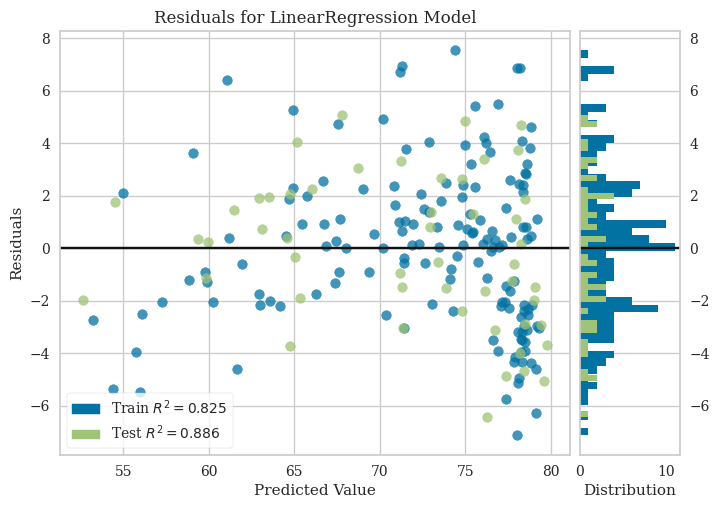

In [26]:
# Multi-variate analysis with BR and MR
print(year2020_cluster.groupby('Clusters')['Country Name'].count())
avg_MR_high_income_countries = df_2020.groupby('Income Group')['MR'].mean()

df_2020 = df_2020.dropna(subset=["MR"])

X = df_2020[['BR', 'MR']].values.reshape(-1,2)
y = df_2020['LE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
lm3 = linear_model.LinearRegression().fit(X_train, y_train)
lm3_predicted = lm3.predict(X_test)
r2 = r2_score(y_test, lm3_predicted)
n=len(X)
k=2
adjusted_r2 = 1- ((1-r2) * (n-1)/(n-k-1))

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm3_predicted)))
print("R^2: ", r2) 
print("Adjusted R-squared: ", adjusted_r2)

pe = PredictionError(lm3).fit(X_train, y_train)
pe.score(X_test, y_test)
pe.show()

rp = ResidualsPlot(lm3).fit(X_train, y_train)
rp.score(X_test, y_test)
rp.show()

del y, X, X_train, X_test, y_train, y_test, lm3, lm3_predicted,adjusted_r2,k,n,pe,r2,rp

By including Mortality Rate as a second predcitor in our model's the RMSE reduced to 2.78 from 3.74, and  
the Adjusted $R^{2}$ also increased to 0.886 from 0.80  

It makes sense as we saw that countries in Cluster 3 are suffering from a high infant Mortality Rate that lowers Life expectancy despite having a high Birth Rate.

## Conclusion
In this notebook, we developed a model to predict Human Life Expectancy of countries and identified a strong correlation between Birth Rate and Life Expectancy.    
The model achieved an accuracy of 80% with Birth Rate as the sole predictor, and 88.6% with both Birth Rate and Infant Mortality rate as predictors.   Incorporating Income level as a predictor did not significantly improve the model's accuracy, most likely due to income variation within a country's demographic composition leading to unequal access to healthcare.

Additionally, we categorized countries into three clusters.  
These clusters provided a basis for further exploration of factors influencing variations in Life Expectancy within each cluster. For instance, we found that Sub-Saharan African countries in Cluster 3 exhibited low Life Expectancy and high Birth Rate, likely attributed to their high infant mortality rates.

Conducting additional research may uncover other potential variables that impact the relationship between these factors.

By understanding these factors, governments and policymakers can make well-informed decisions, implement targeted public health policies, and introduce programs tailored to the specific needs of each cluster. 


